### Monopole wave 3 - Heavyside - with Speed 
### Outside of R we have the full normal Schwarshild metric. Inside of R we have a Minkowski metric (or a smaller black hole, but for now we just have vacuum there for simplicity). 

## R is now a function of t - it has a velocity.


In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, oo
from sympy import Heaviside, nan
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor

sympy.init_printing()

### Use plain coordinates. 



![alt-text](img/schwarschild.png "Schwarschild coords")


# Heavyside 
### Inside R the metric is flat. Evaluating the Einstein Tensor one gets a mass shell delta function at R. Noe that the mass shell mass   


In [45]:
t, r, theta, phi = sympy.symbols("t r theta phi")
G, M, c, a, w, R = sympy.symbols("G M c a w, R")
M = 1
a = 2*M

#R = sympy.sqrt((r/M))*2*M
R = 2*M + sympy.sqrt(100*t)
print(sympy.diff(R, t))
#R = 5*M
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - Heaviside(r - R)*a/r)
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - Heaviside(r - R)*a/r) 
list2d[2][2] = (r)**2
list2d[3][3] = (r)**2*(sympy.sin(theta) ** 2)
sch = MetricTensor(list2d, [t, r, theta, phi])
sch.tensor()


5/sqrt(t)


⎡     2⋅θ(r - 10⋅√t - 2)                                        ⎤
⎢-1 + ──────────────────            0             0       0     ⎥
⎢             r                                                 ⎥
⎢                                                               ⎥
⎢                                   1                           ⎥
⎢           0             ──────────────────────  0       0     ⎥
⎢                             2⋅θ(r - 10⋅√t - 2)                ⎥
⎢                         1 - ──────────────────                ⎥
⎢                                     r                         ⎥
⎢                                                               ⎥
⎢                                                  2            ⎥
⎢           0                       0             r       0     ⎥
⎢                                                               ⎥
⎢                                                      2    2   ⎥
⎣           0                       0             0   r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)
#### The zero, zero density term and pressures have delta functions in them. 


In [48]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡0.5⋅(4.0⋅r - 8.0⋅θ(r - 10⋅√t - 2))⋅δ(-r + 10⋅√t + 2)       -10⋅δ(-r + 10⋅√t + 2)                                                  
⎢────────────────────────────────────────────────────   ─────────────────────────────                                              
⎢                          3                            r⋅√t⋅(r - 2⋅θ(r - 10⋅√t - 2))                                              
⎢                         r                                                                                                        
⎢                                                                                                                                  
⎢               -10⋅δ(-r + 10⋅√t + 2)                      -4.0⋅δ(-r + 10⋅√t + 2)                                                  
⎢           ─────────────────────────────              ────────────────────────────────                                            
⎢           r⋅√t⋅(r - 2⋅θ(r - 10⋅√t - 2))              r⋅(2.0⋅r - 4.0⋅θ(r - 

### If we integrate various terms of the stress energy tensor (which is einst) above, we get the mass of the mass shell we need to support this. 

First - the zero - zero term. The shellMass comes out to M when R is at the hoizon (IE we don't need a shell, and 2M way out. Seems to me we need to use shellMass - M as the actual shell mass required? EG if R is way out at 1000M the shell by logical argument should be close to M in mass, and when the shell disappears behind the singularity its mass goes to zero, as the Schewarschild solution is a vacuum solution. 

Also there is pressure to deal with.


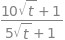

In [49]:
shellMass = sympy.integrate(einst[0][0]*(r**2),  (r, -oo, oo))
shellMass = sympy.simplify(shellMass)
shellMass

### Ok Pressure, lets see radial direction

#### radial pressure gets bigger as R descreases, at R = 2M pressure is -4M (if I have the units right). At R -> large, total pressure goes to -2M, This is the total pressure to hold the shell in place.

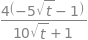

In [50]:
pressureInt = sympy.integrate(einst[1][1]*r**2,  (r, -oo, oo))
pressureInt = sympy.simplify(pressureInt)
pressureInt

In [22]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡  ⎛    3  (1)                      2                2       2  (1)                                      (1)                       
⎢2⋅⎝13⋅r ⋅δ    (-r + 5⋅t + 5) - 50⋅r ⋅δ(-r + 5⋅t + 5)  - 28⋅r ⋅δ    (-r + 5⋅t + 5)⋅θ(r - 5⋅t - 5) + 6⋅r⋅δ    (-r + 5⋅t + 5)⋅θ(r - 5
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                   2 ⎛ 2                                        2⎞                
⎢                                                                  r ⋅⎝r  - 4⋅r⋅θ(r - 5⋅t - 5) + 4⋅θ(r - 5⋅t - 5) ⎠                
⎢                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                           

#Hopefully get a velocity where Ricci is zero 


In [ ]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

In [ ]:
weyl[0,1,0,1]

In [ ]:
weyl[0,2,0,2]

In [ ]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1, 5)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 5)[0][1][0][1]
z = -func(1.0,x,1, 1, 1, 5)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


